# Data Cleaning and summary


### Missing values, inconsistent call durations

Missing values found in the data:
resRespondent             0
ResIntervCall             0
ResLastCallDate           0
LastCallWeekDay           0
LastCallStartTime         0
CallDurationInSeconds     0
CallDurationInMinutes     0
resCallCount              0
resCodeResult            35
DialingMode               0
CaseResult               81
TELN                      0
PANEL                     0
dtype: int64
Inconsistent call durations found:
        resRespondent ResIntervCall  ResLastCallDate  LastCallWeekDay  \
6                   1           454         20231128                3   
14                  3           470         20231025                4   
15                  3           470         20231025                4   
16                  3           470         20231025                4   
17                  3           470         20231025                4   
...               ...           ...              ...              ...   
99988           32761           454        

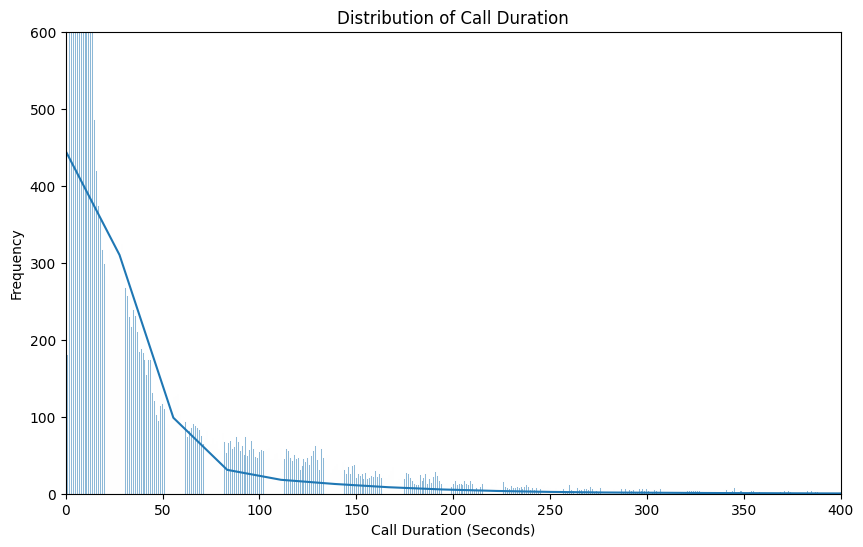

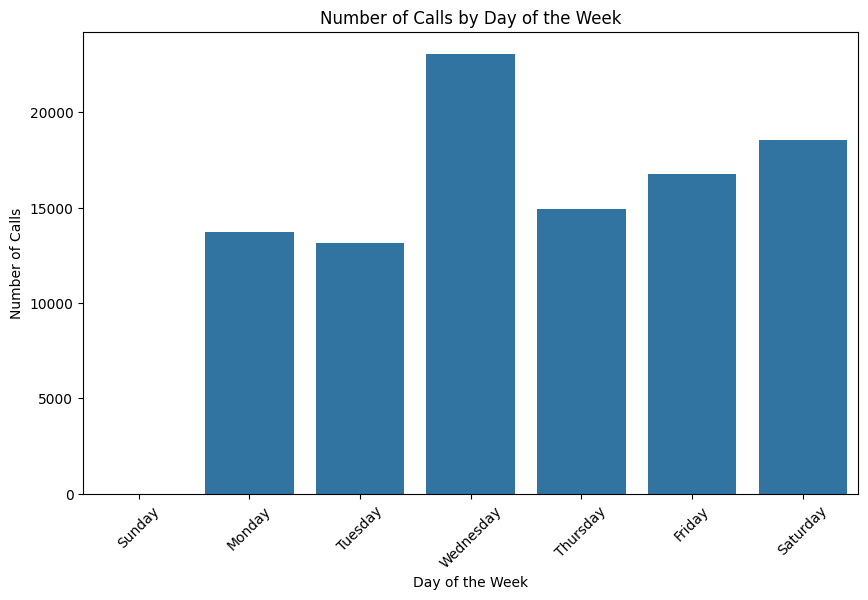

In [1]:


import pandas as pd

df = pd.read_csv('metadata.csv', delimiter=';')



if df.isnull().values.any():
    print("Missing values found in the data:")
    print(df.isnull().sum())
    # Handle missing values as needed
  

# Check if all rows have the same number of columns
expected_columns = len(df.columns)
invalid_rows = df[df.apply(lambda x: len(x) != expected_columns, axis=1)]
if not invalid_rows.empty:
    print("Rows with incorrect number of columns found:")
    print(invalid_rows)
    # Handle rows with incorrect number of columns as needed

    
# Check for specific inconsistencies or invalid data
# For example, ensure that 'CallDurationInMinutes' matches 'CallDurationInSeconds'
df['CalculatedMinutes'] = df['CallDurationInSeconds'] // 60
inconsistent_rows = df[df['CallDurationInMinutes'] != df['CalculatedMinutes']]
if not inconsistent_rows.empty:
    print("Inconsistent call durations found:")
    print(inconsistent_rows)
    # Handle inconsistent data as needed
# Drop the helper column after consistency check
df = df.drop(columns=['CalculatedMinutes'])
    

# Display the DataFrame to ensure it is read correctly
#print(df.head())



import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Call Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['CallDurationInSeconds'], kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (Seconds)')
plt.ylabel('Frequency')
plt.ylim(0, 600)   # Adjust y-axis limit for better visualization (example value, adjust as needed)
plt.xlim(0, 400)
plt.show()

# Bar plot for Calls by Day of the Week
# Map day numbers to weekday names
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Convert LastCallWeekDay to categorical with weekday names
df['LastCallWeekDay'] = df['LastCallWeekDay'].map(weekday_labels)

# Bar plot for Calls by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='LastCallWeekDay', data=df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Number of Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()





# Descriptive analysis 

### Landline and mobile calls - success rate 

Mobilfunk-Anrufe:  54228
Festnetz-Anrufe:  45901
Panelkontakte insgesamt:  10166
Kaltkontakte insgesamt:  89963
----Erfolgreiche Interviews----
Panelkontakt Mobil:  494
Kaltkontakt Mobil:  235
Kaltkontakt Festnetz:  247
Panelkontakt Festnetz:  594
Erfolgreiche Interviews insgesamt:  1570

Erfolgsquote insgesamt pro Wochentag:
Monday: 1.93% (Anrufe: 13719, Erfolgreiche Interviews: 265)
Tuesday: 1.69% (Anrufe: 13132, Erfolgreiche Interviews: 222)
Wednesday: 1.31% (Anrufe: 23060, Erfolgreiche Interviews: 301)
Thursday: 2.04% (Anrufe: 14949, Erfolgreiche Interviews: 305)
Friday: 1.58% (Anrufe: 16744, Erfolgreiche Interviews: 264)
Saturday: 1.15% (Anrufe: 18525, Erfolgreiche Interviews: 213)

Mobilfunk - Erfolgsquote pro Wochentag:
Monday: 1.78% (Anrufe: 7549, Erfolgreiche Interviews: 134)
Tuesday: 1.49% (Anrufe: 7047, Erfolgreiche Interviews: 105)
Wednesday: 1.10% (Anrufe: 12237, Erfolgreiche Interviews: 135)
Thursday: 1.79% (Anrufe: 8221, Erfolgreiche Interviews: 147)
Friday: 1.33% (Anruf

/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/615703332.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_calls_day_of_week_stats.index, y=all_calls_day_of_week_stats.values, palette='viridis', label="Anrufe")


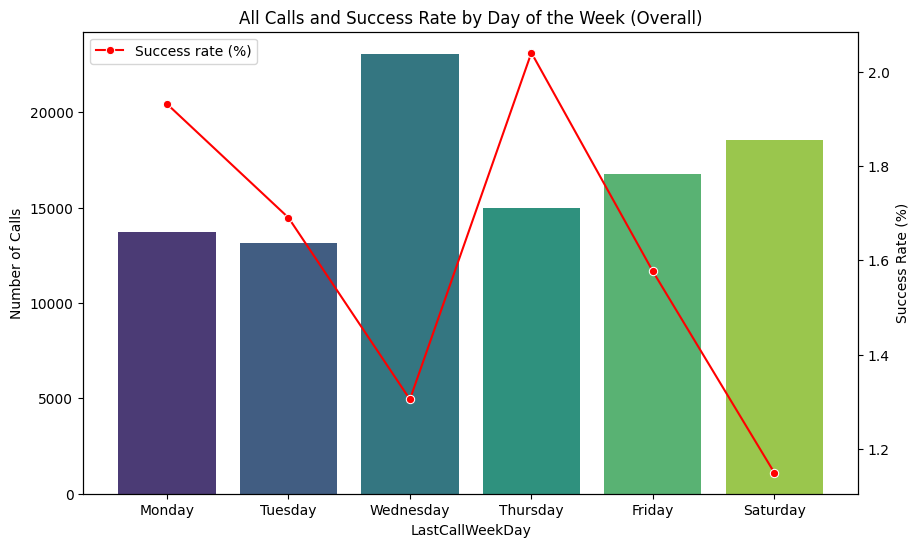

/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/615703332.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_calls_day_of_week_mobil.index, y=all_calls_day_of_week_mobil.values, palette='viridis', label="Mobilfunk-Anrufe")


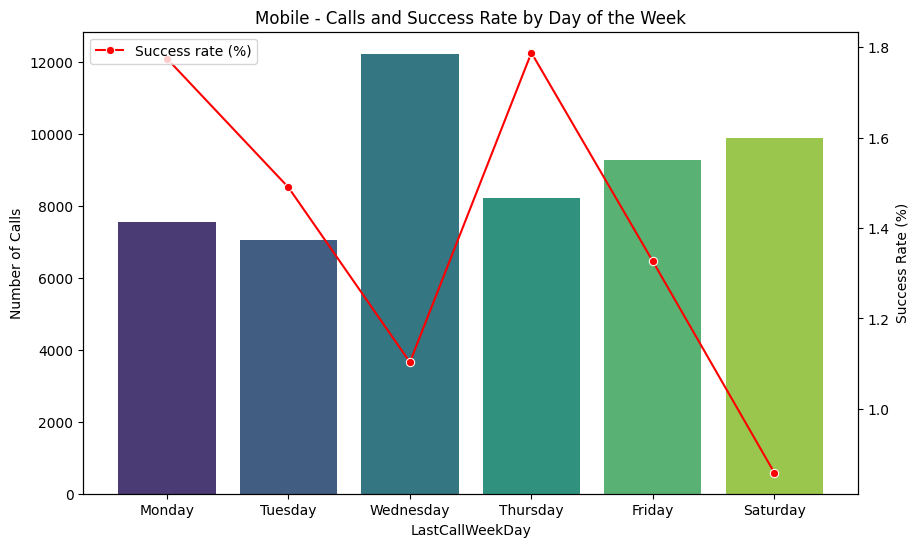

/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/615703332.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_calls_day_of_week_festnetz.index, y=all_calls_day_of_week_festnetz.values, palette='viridis', label="Festnetz-Anrufe")


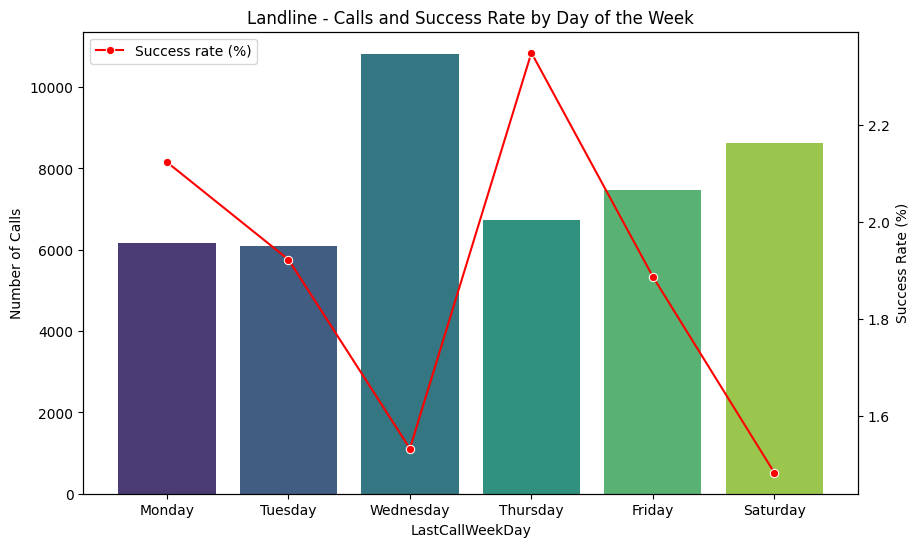

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('metadata.csv', delimiter=';')

# Anzahl der Mobil- und Festnetzanrufe (TELN: 1 = Mobilfunk, 2 = Festnetz)
mobil_count = df[df['TELN'] == 1].shape[0]
festnetz_count = df[df['TELN'] == 2].shape[0]
print("Mobilfunk-Anrufe: ", mobil_count)
print("Festnetz-Anrufe: ", festnetz_count)

# Panelkontakte und Kaltkontakte insgesamt (PANEL: 1 = Panelkontakt, 2 = Kaltkontakt)
panel_count = df[df['PANEL'] == 1].shape[0]
kaltkontakt_count = df[df['PANEL'] == 2].shape[0]
print("Panelkontakte insgesamt: ", panel_count)
print("Kaltkontakte insgesamt: ", kaltkontakt_count)
print("----Erfolgreiche Interviews----")

# Erfolgreiche Interviews (CaseResult: PM, KM, KF, PF)
pm_count = df[df['CaseResult'] == 'PM'].shape[0]
km_count = df[df['CaseResult'] == 'KM'].shape[0]
kf_count = df[df['CaseResult'] == 'KF'].shape[0]
pf_count = df[df['CaseResult'] == 'PF'].shape[0]

print("Panelkontakt Mobil: ", pm_count)
print("Kaltkontakt Mobil: ", km_count)
print("Kaltkontakt Festnetz: ", kf_count)
print("Panelkontakt Festnetz: ", pf_count)

variables = [pm_count, km_count, kf_count, pf_count]
total_sum = sum(variables)
print("Erfolgreiche Interviews insgesamt: ", total_sum)

# Call Count by day of the week for all calls (successful and unsuccessful)
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
df['LastCallWeekDay'] = df['LastCallWeekDay'].astype(int).map(weekday_labels)

# Gesamtanzahl aller Anrufe pro Wochentag (unabhängig vom Erfolg)
all_calls_day_of_week_stats = df['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Mobil- und Festnetzanrufe getrennt für alle Anrufe
all_calls_day_of_week_mobil = df[df['TELN'] == 1]['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
all_calls_day_of_week_festnetz = df[df['TELN'] == 2]['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Call Count by day of the week for successful calls
case_results_of_interest = ['PM', 'KM', 'KF', 'PF']
filtered_df = df[df['CaseResult'].isin(case_results_of_interest)].copy()  # Filter only successful calls

# Gesamtanzahl erfolgreicher Anrufe pro Wochentag
successful_calls_day_of_week_stats = filtered_df['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Mobil- und Festnetzanrufe getrennt für erfolgreiche Anrufe
successful_calls_day_of_week_mobil = filtered_df[filtered_df['TELN'] == 1]['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
successful_calls_day_of_week_festnetz = filtered_df[filtered_df['TELN'] == 2]['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Erfolgsquoten berechnen
# Erfolgsquote = (Anzahl erfolgreicher Anrufe / Gesamtanzahl Anrufe) * 100
success_rate_total = (successful_calls_day_of_week_stats / all_calls_day_of_week_stats) * 100
success_rate_mobil = (successful_calls_day_of_week_mobil / all_calls_day_of_week_mobil) * 100
success_rate_festnetz = (successful_calls_day_of_week_festnetz / all_calls_day_of_week_festnetz) * 100

# Ausgabe der Erfolgsquoten, Anrufzahlen und erfolgreichen Interviews
print("\nErfolgsquote insgesamt pro Wochentag:")
for day in success_rate_total.index:
    print(f"{day}: {success_rate_total[day]:.2f}% (Anrufe: {all_calls_day_of_week_stats[day]}, Erfolgreiche Interviews: {successful_calls_day_of_week_stats[day]})")

print("\nMobilfunk - Erfolgsquote pro Wochentag:")
for day in success_rate_mobil.index:
    print(f"{day}: {success_rate_mobil[day]:.2f}% (Anrufe: {all_calls_day_of_week_mobil[day]}, Erfolgreiche Interviews: {successful_calls_day_of_week_mobil[day]})")

print("\nFestnetz - Erfolgsquote pro Wochentag:")
for day in success_rate_festnetz.index:
    print(f"{day}: {success_rate_festnetz[day]:.2f}% (Anrufe: {all_calls_day_of_week_festnetz[day]}, Erfolgreiche Interviews: {successful_calls_day_of_week_festnetz[day]})")

# Visualisierung der Anrufe und Erfolgsquoten

# Gesamtanzahl aller Anrufe und Erfolgsquoten pro Wochentag
plt.figure(figsize=(10, 6))
sns.barplot(x=all_calls_day_of_week_stats.index, y=all_calls_day_of_week_stats.values, palette='viridis', label="Anrufe")
plt.ylabel('Number of Calls')
plt.twinx()  # Zwillingsachse für die Erfolgsquote
sns.lineplot(x=success_rate_total.index, y=success_rate_total.values, marker='o', color='red', label="Success rate (%)")
plt.title('All Calls and Success Rate by Day of the Week (Overall)')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Mobilfunk-Anrufe und Erfolgsquote pro Wochentag
plt.figure(figsize=(10, 6))
sns.barplot(x=all_calls_day_of_week_mobil.index, y=all_calls_day_of_week_mobil.values, palette='viridis', label="Mobilfunk-Anrufe")
plt.ylabel('Number of Calls')
plt.twinx()  # Zwillingsachse für die Erfolgsquote
sns.lineplot(x=success_rate_mobil.index, y=success_rate_mobil.values, marker='o', color='red', label="Success rate (%)")
plt.title('Mobile - Calls and Success Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Festnetz-Anrufe und Erfolgsquote pro Wochentag
plt.figure(figsize=(10, 6))
sns.barplot(x=all_calls_day_of_week_festnetz.index, y=all_calls_day_of_week_festnetz.values, palette='viridis', label="Festnetz-Anrufe")
plt.ylabel('Number of Calls')
plt.twinx()  # Zwillingsachse für die Erfolgsquote
sns.lineplot(x=success_rate_festnetz.index, y=success_rate_festnetz.values, marker='o', color='red', label="Success rate (%)")
plt.title('Landline - Calls and Success Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


## Analysis of the success rate for the first calls 



/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/1507287088.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_first_attempts['LastCallWeekDay'] = successful_first_attempts['LastCallWeekDay'].astype(int).map(weekday_labels)
/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/1507287088.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_first_attempts_by_day.index, y=total_first_attempts_by_day.values, palette='viridis', label="Erstanrufe gesamt")



Gesamtzahl der Erstanrufe nach Wochentag:
LastCallWeekDay
Monday        2985
Tuesday       4334
Wednesday    12443
Thursday      2817
Friday        3431
Saturday      6804
Name: count, dtype: int64

Erfolgreiche Erstanrufe nach Wochentag:
LastCallWeekDay
Monday         9
Tuesday       31
Wednesday    102
Thursday      29
Friday        20
Saturday      39
Name: count, dtype: int64

Erfolgsquote für Erstanrufe nach Wochentag:
LastCallWeekDay
Monday       0.301508
Tuesday      0.715275
Wednesday    0.819738
Thursday     1.029464
Friday       0.582920
Saturday     0.573192
Name: count, dtype: float64


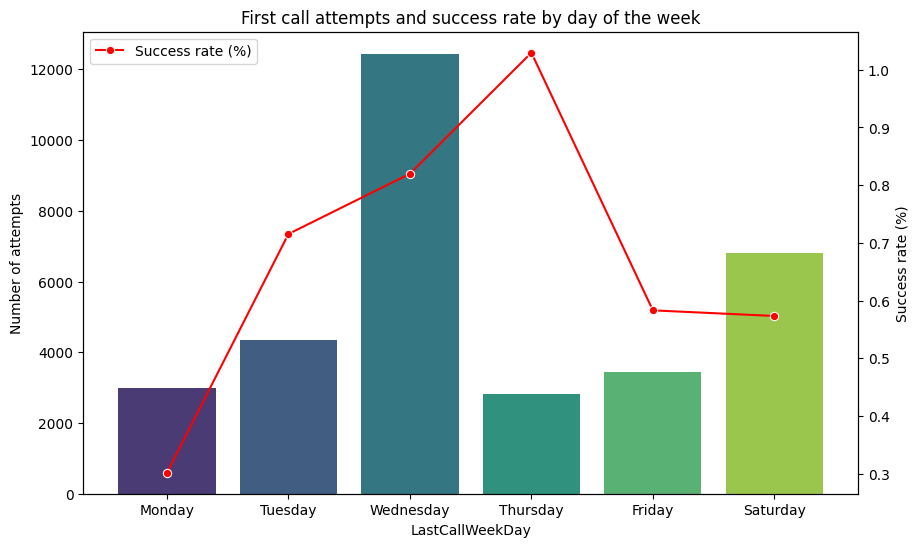

In [3]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure the ResLastCallDate is in datetime format
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Sort by participant and call date to ensure chronological order
df = df.sort_values(by=['resRespondent', 'ResLastCallDate'])

# Group by participant and get the first call for each (irrespective of success)
first_calls = df.groupby('resRespondent').first().reset_index()

# Filter for successful first attempts
successful_case_results = ['PM', 'KM', 'KF', 'PF']
successful_first_attempts = first_calls[first_calls['CaseResult'].isin(successful_case_results)]

# Map the days of the week for both successful and all first calls
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
first_calls['LastCallWeekDay'] = first_calls['LastCallWeekDay'].astype(int).map(weekday_labels)
successful_first_attempts['LastCallWeekDay'] = successful_first_attempts['LastCallWeekDay'].astype(int).map(weekday_labels)

# Count the total number of first calls by day of the week (all attempts)
total_first_attempts_by_day = first_calls['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Count the successful first attempts by day of the week (successful only)
successful_first_attempts_by_day = successful_first_attempts['LastCallWeekDay'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Calculate the success rate for first attempts by day of the week
success_rate_by_day = (successful_first_attempts_by_day / total_first_attempts_by_day) * 100

# Print the results in German
print("\nGesamtzahl der Erstanrufe nach Wochentag:")
print(total_first_attempts_by_day)

print("\nErfolgreiche Erstanrufe nach Wochentag:")
print(successful_first_attempts_by_day)

print("\nErfolgsquote für Erstanrufe nach Wochentag:")
print(success_rate_by_day)

# Visualize the total first attempts and success rate (with German labels)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_first_attempts_by_day.index, y=total_first_attempts_by_day.values, palette='viridis', label="Erstanrufe gesamt")
plt.ylabel('Number of attempts')

# Create a secondary axis for the success rate
plt.twinx()
sns.lineplot(x=success_rate_by_day.index, y=success_rate_by_day.values, marker='o', color='red', label="Success rate (%)")
plt.title('First call attempts and success rate by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Success rate (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()









## What is the best day to make an appointment (Terminabsprache)?






Success Rate of Appointments by Day of the Week:
         Day  SuccessRate
0     Monday     0.337868
1    Tuesday     0.353623
2  Wednesday     0.406667
3   Thursday     0.316159
4     Friday     0.327014
5   Saturday     0.374134


/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/920721833.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='SuccessRate', data=success_rate_df, palette='viridis')


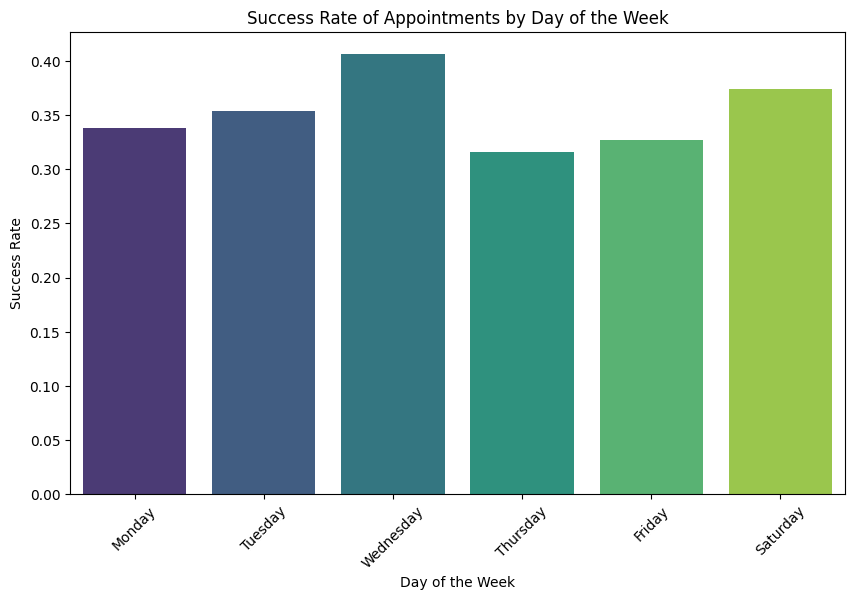

In [4]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure the ResLastCallDate is in datetime format
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Step 2: Identify Appointment Set Calls ("02")
appointment_set_calls = df[df['CaseResult'] == '02'].copy()

# Map the days of the week
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
appointment_set_calls['LastCallWeekDay'] = appointment_set_calls['LastCallWeekDay'].astype(int).map(weekday_labels)

# Initialize dictionaries to track success and total appointments by day
appointments_by_day = {day: 0 for day in weekday_labels.values() if day != 'Sunday'}
successful_appointments_by_day = {day: 0 for day in weekday_labels.values() if day != 'Sunday'}

# Step 3: Track Follow-up Calls
for respondent_id in appointment_set_calls['resRespondent'].unique():
    respondent_calls = df[df['resRespondent'] == respondent_id].sort_values(by='ResLastCallDate')
    for _, appointment in appointment_set_calls[appointment_set_calls['resRespondent'] == respondent_id].iterrows():
        appointment_date = appointment['ResLastCallDate']
        day_of_week = appointment['LastCallWeekDay']
        appointments_by_day[day_of_week] += 1
        
        follow_up_calls = respondent_calls[respondent_calls['ResLastCallDate'] > appointment_date]
        if not follow_up_calls.empty:
            if any(follow_up_calls['CaseResult'].isin(successful_case_results)):
                successful_appointments_by_day[day_of_week] += 1

# Calculate success rate by day
success_rate_by_day = {day: (successful_appointments_by_day[day] / appointments_by_day[day] if appointments_by_day[day] > 0 else 0) for day in appointments_by_day.keys()}

# Convert to DataFrame for visualization
success_rate_df = pd.DataFrame(list(success_rate_by_day.items()), columns=['Day', 'SuccessRate'])

# Print the results
print("\nSuccess Rate of Appointments by Day of the Week:")
print(success_rate_df)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='SuccessRate', data=success_rate_df, palette='viridis')
plt.title('Success Rate of Appointments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()


## Calling each respondent a maximum of 10 times - how well does that fare?

### Calculating the success rate (in relation to the total number of calls) and the cumulative success rate

Anzahl der Personen, die bei jedem Anrufversuch (1-10) erreicht wurden:
resCallCount
1     224
2     311
3     258
4     214
5     141
6     106
7      72
8      41
9      46
10     28
Name: count, dtype: int64

Gesamtzahl der Anrufversuche (1-10):
resCallCount
1     32814
2     11361
3      9979
4      9059
5      8405
6      7408
7      6091
8      5555
9      4708
10     3311
Name: count, dtype: int64

Erfolgsrate pro Anrufversuch im Verhältnis zur Gesamtzahl der Versuche:
resCallCount
1     0.006826
2     0.027374
3     0.025854
4     0.023623
5     0.016776
6     0.014309
7     0.011821
8     0.007381
9     0.009771
10    0.008457
Name: count, dtype: float64

Kumulative Erfolgsrate (bis zum jeweiligen Anrufversuch):
resCallCount
1     0.006826
2     0.016304
3     0.024167
4     0.030688
5     0.034985
6     0.038215
7     0.040410
8     0.041659
9     0.043061
10    0.043914
Name: count, dtype: float64


/var/folders/xx/3nnwdj2x3rz7m3gcbzflw6pr0000gn/T/ipykernel_50145/2474733350.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate_by_call_attempt.index, y=success_rate_by_call_attempt.values, palette='viridis', label='Success rate per call attempt')


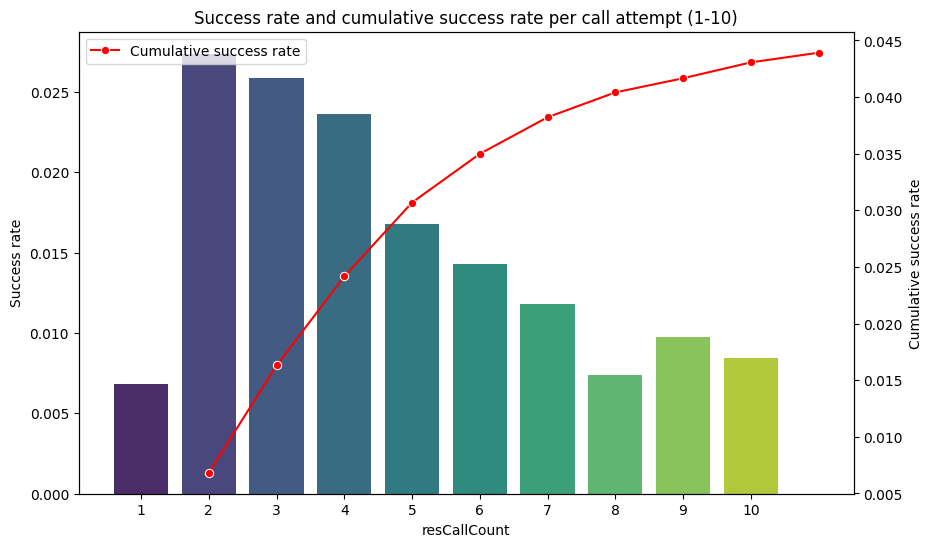

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure we're only looking at the first 10 calls
df = df[df['resCallCount'] <= 10]

# Define the successful interviews
successful_case_results = ['PM', 'KM', 'KF', 'PF']

# Filter only the relevant columns
df = df[['resRespondent', 'resCallCount', 'CaseResult']]

# Filter for successful interviews
df_successful = df[df['CaseResult'].isin(successful_case_results)]

# Get the first successful call attempt for each respondent
first_successful_call = df_successful.groupby('resRespondent')['resCallCount'].min().reset_index()

# Calculate the total number of respondents reached on each call attempt (1 to 10)
total_reached_by_attempt = first_successful_call['resCallCount'].value_counts().sort_index()

# Display the number of people reached on each attempt
print("Anzahl der Personen, die bei jedem Anrufversuch (1-10) erreicht wurden:")
print(total_reached_by_attempt)

# Calculate the total number of call attempts for each attempt (including unsuccessful ones)
total_call_attempts_by_attempt = df['resCallCount'].value_counts().sort_index()

# Display the total number of call attempts by attempt
print("\nGesamtzahl der Anrufversuche (1-10):")
print(total_call_attempts_by_attempt)

# Calculate the success rate relative to the total number of attempts for each call attempt
success_rate_by_call_attempt = total_reached_by_attempt / total_call_attempts_by_attempt

# Display results
print("\nErfolgsrate pro Anrufversuch im Verhältnis zur Gesamtzahl der Versuche:")
print(success_rate_by_call_attempt)

# Calculate the cumulative success rate (how many people were reached by or before each attempt)
cumulative_success_rate = total_reached_by_attempt.cumsum() / len(df['resRespondent'].unique())

# Display cumulative success rate
print("\nKumulative Erfolgsrate (bis zum jeweiligen Anrufversuch):")
print(cumulative_success_rate)

# Visualize the success rate by call attempt and cumulative success rate
plt.figure(figsize=(10, 6))

# Bar plot for success rate by call attempt
sns.barplot(x=success_rate_by_call_attempt.index, y=success_rate_by_call_attempt.values, palette='viridis', label='Success rate per call attempt')
plt.ylabel('Success rate')

# Add a line plot for cumulative success rate
plt.twinx()
sns.lineplot(x=cumulative_success_rate.index, y=cumulative_success_rate.values, marker='o', color='red', label='Cumulative success rate')
plt.ylabel('Cumulative success rate')
plt.title('Success rate and cumulative success rate per call attempt (1-10)')
plt.xlabel('Number of call attempts')
plt.legend(loc='upper left')
plt.show()


## Heatmap of all successful calls, categorised by weekday and time of day


Total Calls and Successful Calls by Day and Hour:
LastCallWeekDay     Monday    Tuesday  Wednesday   Thursday     Friday  \
CallHour                                                                 
11.0              237 / 21   173 / 18  1579 / 19   655 / 28  1193 / 20   
12.0             1103 / 24   793 / 14  3212 / 32  1294 / 37  2288 / 29   
13.0             1183 / 19  1186 / 16  3937 / 32  2184 / 39  2698 / 19   
14.0             1181 / 32   856 / 17  2585 / 35  2036 / 33  1838 / 40   
15.0             1985 / 30  1812 / 36  2552 / 25  2285 / 31  2259 / 29   
16.0             2576 / 41  1923 / 35  2534 / 47  1995 / 43  2037 / 36   
17.0             2205 / 40  2237 / 38  2372 / 51  1708 / 42  1618 / 38   
18.0             2166 / 35  2755 / 30  2772 / 43  1943 / 38  2035 / 40   
19.0             1082 / 23  1396 / 18  1516 / 17   846 / 13   777 / 13   
20.0                 1 / 0      1 / 0      0 / 0      3 / 1      1 / 0   

LastCallWeekDay   Saturday Sunday  
CallHour                

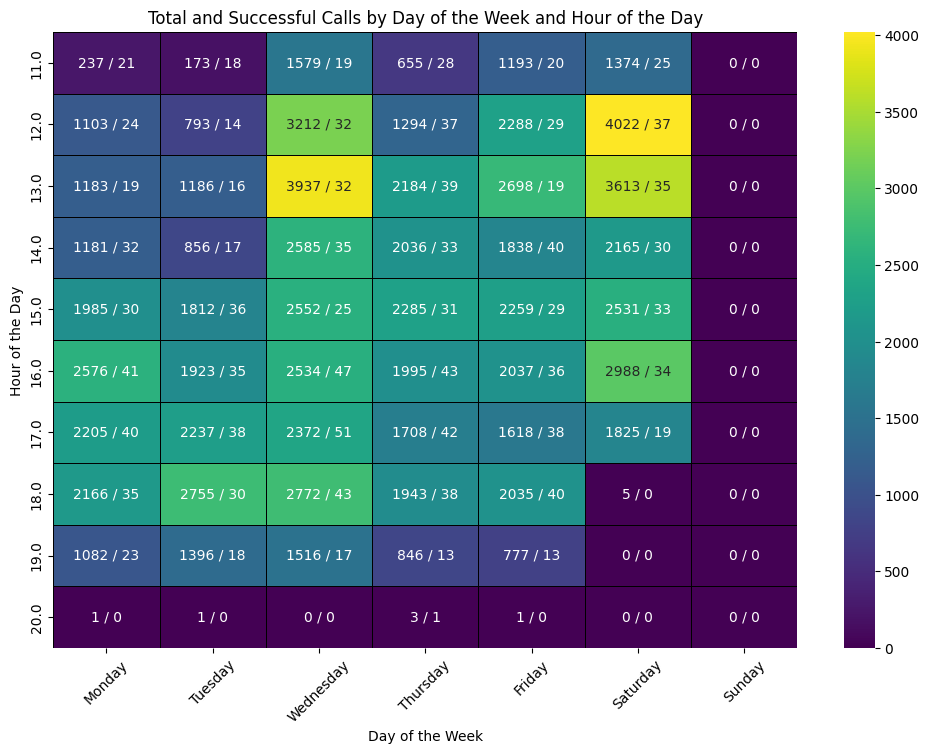

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure the ResLastCallDate is in datetime format
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Define the CaseResult values of interest for successful calls
successful_case_results = ['PM', 'PF', 'KM', 'KF']

# Step 1: Prepare the data for all calls
all_calls = df.copy()

# Step 2: Prepare the data for successful calls
successful_calls = df[df['CaseResult'].isin(successful_case_results)].copy()

# Step 3: Map the Weekday Labels
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
all_calls['LastCallWeekDay'] = all_calls['LastCallWeekDay'].astype(int).map(weekday_labels)
successful_calls['LastCallWeekDay'] = successful_calls['LastCallWeekDay'].astype(int).map(weekday_labels)

# Step 4: Extract the Time of Day
def parse_time(time_str):
    try:
        return pd.to_datetime(time_str, format='%H:%M', errors='coerce').hour
    except ValueError:
        return None

all_calls['CallHour'] = all_calls['LastCallStartTime'].apply(parse_time)
successful_calls['CallHour'] = successful_calls['LastCallStartTime'].apply(parse_time)

# Remove rows with invalid times
all_calls = all_calls.dropna(subset=['CallHour'])
successful_calls = successful_calls.dropna(subset=['CallHour'])

# Step 5: Count the Calls by Day and Hour
calls_by_day_hour = all_calls.pivot_table(index='CallHour', columns='LastCallWeekDay', aggfunc='size', fill_value=0)
successful_calls_by_day_hour = successful_calls.pivot_table(index='CallHour', columns='LastCallWeekDay', aggfunc='size', fill_value=0)

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure both tables have the same columns and rows in the defined order
calls_by_day_hour = calls_by_day_hour.reindex(columns=day_order, fill_value=0)
successful_calls_by_day_hour = successful_calls_by_day_hour.reindex(columns=day_order, fill_value=0)

# Ensure both tables have the same rows (hours)
common_index = calls_by_day_hour.index.intersection(successful_calls_by_day_hour.index)
calls_by_day_hour = calls_by_day_hour.loc[common_index]
successful_calls_by_day_hour = successful_calls_by_day_hour.loc[common_index]

# Combine the two tables into a single DataFrame with both values
combined_df = calls_by_day_hour.astype(str) + ' / ' + successful_calls_by_day_hour.astype(str)

# Print the results
print("\nTotal Calls and Successful Calls by Day and Hour:")
print(combined_df)

# Create a plot
plt.figure(figsize=(12, 8))
sns.heatmap(calls_by_day_hour, annot=combined_df, fmt='', cmap='viridis', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Total and Successful Calls by Day of the Week and Hour of the Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


## Panelcontacts - interviews by day & hour, combined in a heatmap



Interviews by Day and Hour:
LastCallWeekDay  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
CallHour                                                               
11                   19       12         14        17      13        17
12                   14       10         20        27      24        23
13                   12        9         20        26      17        22
14                   24       11         23        26      25        17
15                   25       27         19        19      21        24
16                   32       24         29        32      27        19
17                   33       27         35        32      29        10
18                   21       17         32        27      34         0
19                   13        7         13         8       9         0
20                    0        0          0         1       0         0


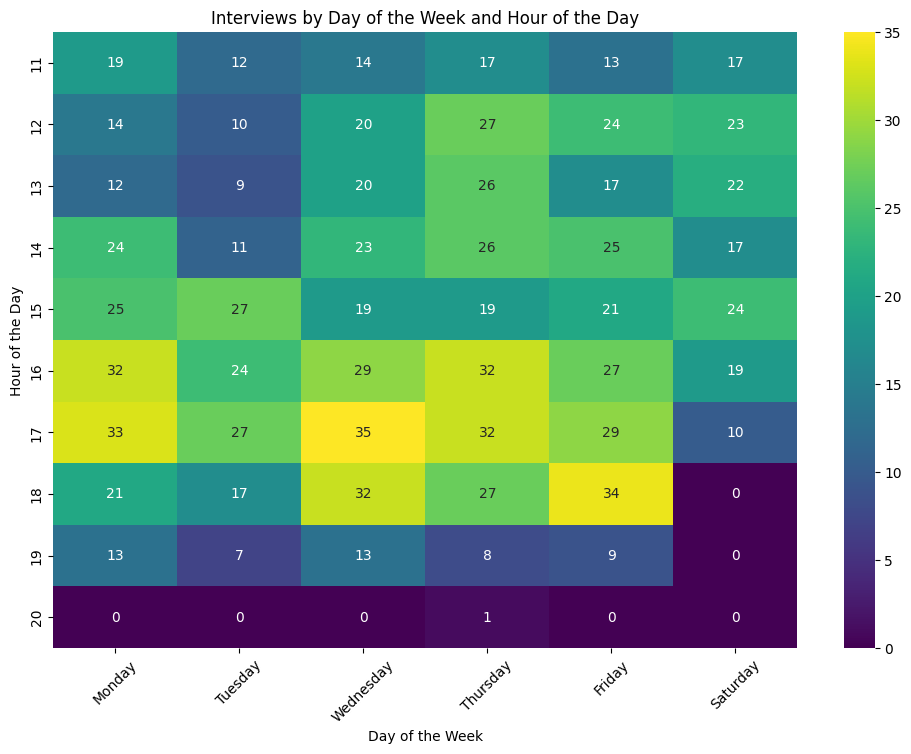

In [7]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure the ResLastCallDate is in datetime format
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Define the CaseResult values of interest for panel contacts
panel_case_results = ['PM', 'PF']

# Step 1: Filter the Data
panel_contacts = df[df['CaseResult'].isin(panel_case_results)].copy()

# Step 2: Map the Weekday Labels
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
panel_contacts['LastCallWeekDay'] = panel_contacts['LastCallWeekDay'].astype(int).map(weekday_labels)

# Step 3: Extract the Time of Day
panel_contacts['CallHour'] = pd.to_datetime(panel_contacts['LastCallStartTime'], format='%H:%M').dt.hour

# Step 4: Count the Interviews by Day and Hour
interviews_by_day_hour = panel_contacts.pivot_table(index='CallHour', columns='LastCallWeekDay', aggfunc='size', fill_value=0)
interviews_by_day_hour = interviews_by_day_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]  # Ensure correct column order

# Print the results
print("\nInterviews by Day and Hour:")
print(interviews_by_day_hour)

# Step 5: Visualize the Results
plt.figure(figsize=(12, 8))
sns.heatmap(interviews_by_day_hour, cmap='viridis', annot=True, fmt='d')
plt.title('Interviews by Day of the Week and Hour of the Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


## New contacts (Kaltkontakte) - interviews by day & hour, combined in a heatmap 


Interviews by Day and Hour for Non-Panel Contacts:
LastCallWeekDay  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
CallHour                                                               
11                    2        6          5        11       7         8
12                   10        4         12        10       5        14
13                    7        7         12        13       2        13
14                    8        6         12         7      15        13
15                    5        9          6        12       8         9
16                    9       11         18        11       9        15
17                    7       11         16        10       9         9
18                   14       13         11        11       6         0
19                   10       11          4         5       4         0


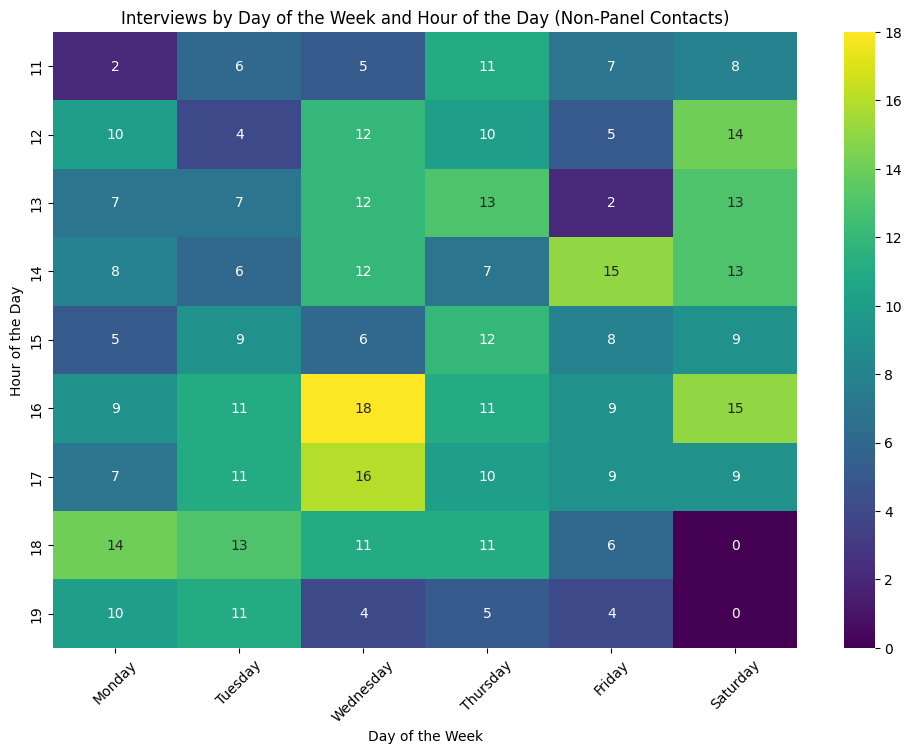

In [8]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('metadata.csv', delimiter=';')

# Ensure the ResLastCallDate is in datetime format
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Define the CaseResult values of interest for non-panel contacts
non_panel_case_results = ['KF', 'KM']

# Step 1: Filter the Data
non_panel_contacts = df[df['CaseResult'].isin(non_panel_case_results)].copy()

# Step 2: Map the Weekday Labels
weekday_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
non_panel_contacts['LastCallWeekDay'] = non_panel_contacts['LastCallWeekDay'].astype(int).map(weekday_labels)

# Step 3: Extract the Time of Day
non_panel_contacts['CallHour'] = pd.to_datetime(non_panel_contacts['LastCallStartTime'], format='%H:%M').dt.hour

# Step 4: Count the Interviews by Day and Hour
interviews_by_day_hour_non_panel = non_panel_contacts.pivot_table(index='CallHour', columns='LastCallWeekDay', aggfunc='size', fill_value=0)
interviews_by_day_hour_non_panel = interviews_by_day_hour_non_panel[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]  # Ensure correct column order

# Print the results
print("\nInterviews by Day and Hour for Non-Panel Contacts:")
print(interviews_by_day_hour_non_panel)

# Step 5: Visualize the Results
plt.figure(figsize=(12, 8))
sns.heatmap(interviews_by_day_hour_non_panel, cmap='viridis', annot=True, fmt='d')
plt.title('Interviews by Day of the Week and Hour of the Day (Non-Panel Contacts)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


## Spearman correlation

### Correlation matrix and the corresponding scatterplots 

Spearman-Korrelationsmatrix:
                       resCallCount  CallDurationInSeconds  LastCallStartTime
resCallCount               1.000000               0.175472           0.082896
CallDurationInSeconds      0.175472               1.000000           0.003026
LastCallStartTime          0.082896               0.003026           1.000000


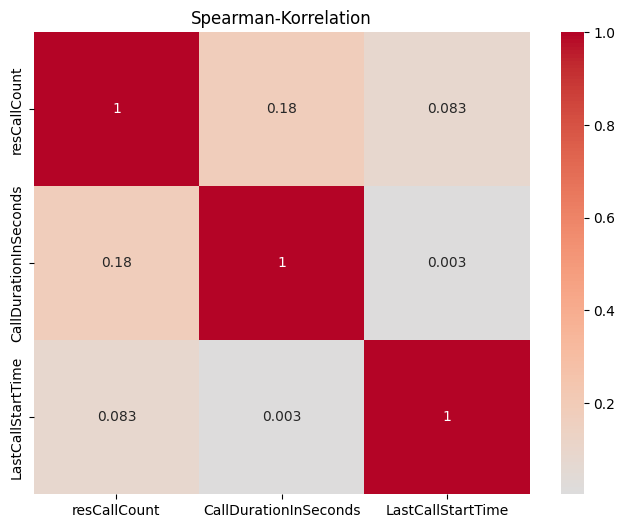

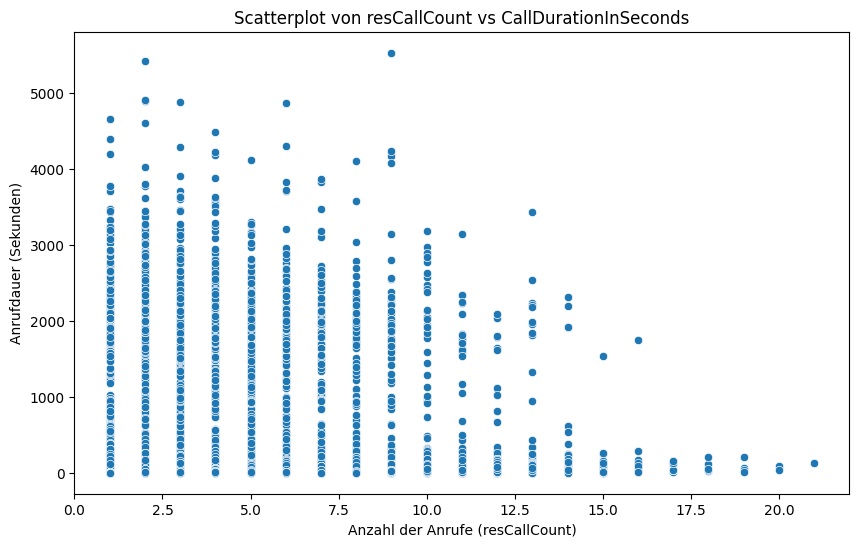

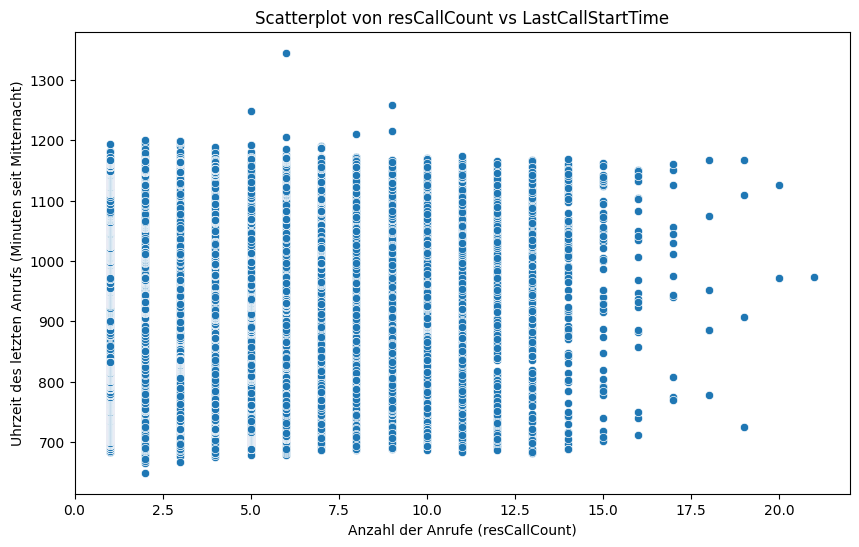

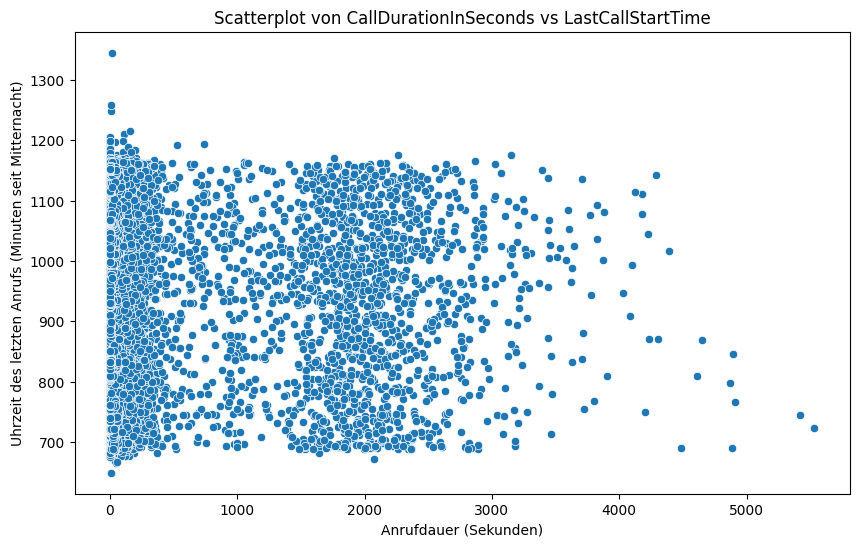

In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Schritt 1: Daten einlesen
df = pd.read_csv('metadata.csv', delimiter=';')

# Schritt 2: ResLastCallDate in Datetime konvertieren
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Schritt 3: Berechnung der Tage seit dem ersten Anruf für jeden Respondenten
df['DaysSinceFirstCall'] = df.groupby('resRespondent')['ResLastCallDate'].transform(lambda x: (x - x.min()).dt.days)

# Schritt 4: Umwandlung von LastCallStartTime in Minuten seit Mitternacht
def convert_time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == '':
        return np.nan  # Umgang mit fehlenden Werten
    try:
        # Aufteilen der Zeit in Stunden, Minuten und Sekunden
        time_parts = time_str.split(':')
        # Wenn nur HH:MM vorhanden ist, setze Sekunden auf 0
        if len(time_parts) == 2:
            hours, minutes = map(int, time_parts)  # HH:MM
            seconds = 0
        elif len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)  # HH:MM:SS
        else:
            raise ValueError("Unrecognized time format")  # Fehler für unerwartetes Format
        return hours * 60 + minutes + seconds / 60  # Umwandlung in Minuten
    except Exception as e:
        print(f"Fehler bei der Umwandlung der Zeit '{time_str}': {e}")
        return np.nan  # Fehlerbehandlung

# Umwandlung der Zeit in Minuten
df['LastCallStartTime'] = df['LastCallStartTime'].apply(convert_time_to_minutes)

# Schritt 5: Berechnung der Spearman-Korrelation
correlation_spearman = df[['resCallCount', 'CallDurationInSeconds', 'LastCallStartTime']].corr(method='spearman')

# Schritt 6: Ergebnisse anzeigen
print("Spearman-Korrelationsmatrix:")
print(correlation_spearman)

# Schritt 7: Heatmap der Spearman-Korrelation erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman-Korrelation')
plt.show()

# Schritt 8: Scatterplots erstellen
# Scatterplot für resCallCount vs CallDurationInSeconds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='resCallCount', y='CallDurationInSeconds', data=df)
plt.title('Scatterplot von resCallCount vs CallDurationInSeconds')
plt.xlabel('Anzahl der Anrufe (resCallCount)')
plt.ylabel('Anrufdauer (Sekunden)')
plt.show()

# Scatterplot für resCallCount vs LastCallStartTime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='resCallCount', y='LastCallStartTime', data=df)
plt.title('Scatterplot von resCallCount vs LastCallStartTime')
plt.xlabel('Anzahl der Anrufe (resCallCount)')
plt.ylabel('Uhrzeit des letzten Anrufs (Minuten seit Mitternacht)')
plt.show()

# Scatterplot für CallDurationInSeconds vs LastCallStartTime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CallDurationInSeconds', y='LastCallStartTime', data=df)
plt.title('Scatterplot von CallDurationInSeconds vs LastCallStartTime')
plt.xlabel('Anrufdauer (Sekunden)')
plt.ylabel('Uhrzeit des letzten Anrufs (Minuten seit Mitternacht)')
plt.show()


## Distribution and the Shapiro-Wilk test 

### The goal is to determine the right choice for a correlation method

Die Variable 'resCallCount' ist kontinuierlich: True


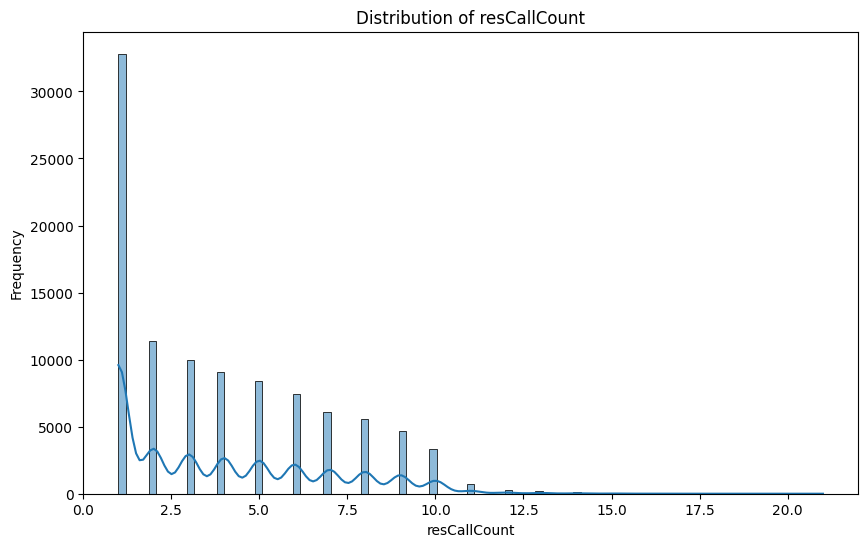

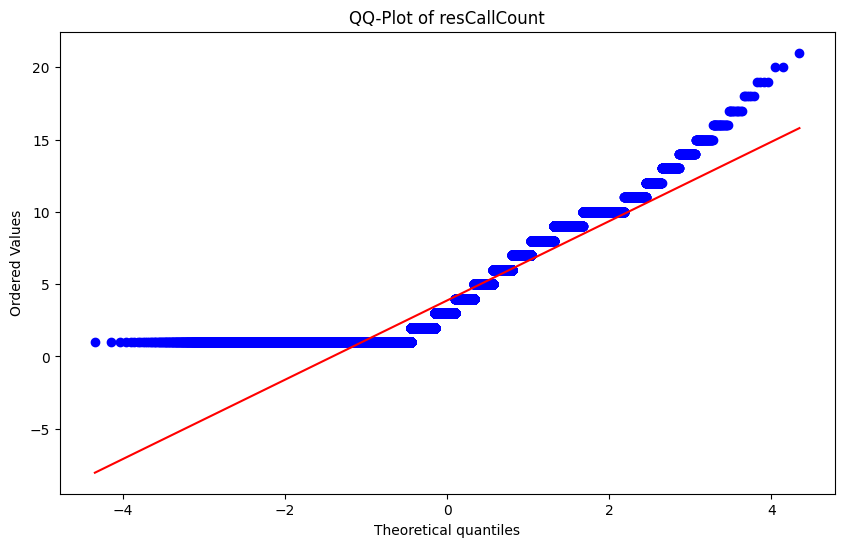

/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100129.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-Wert für resCallCount: 1.0119615020950539e-119
resCallCount ist nicht normalverteilt (p < 0.05).
Die Variable 'CallDurationInSeconds' ist kontinuierlich: True


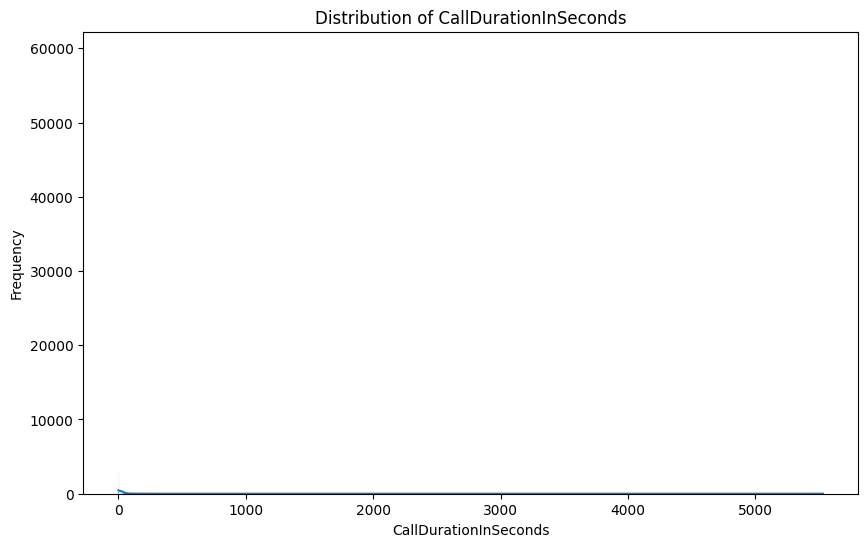

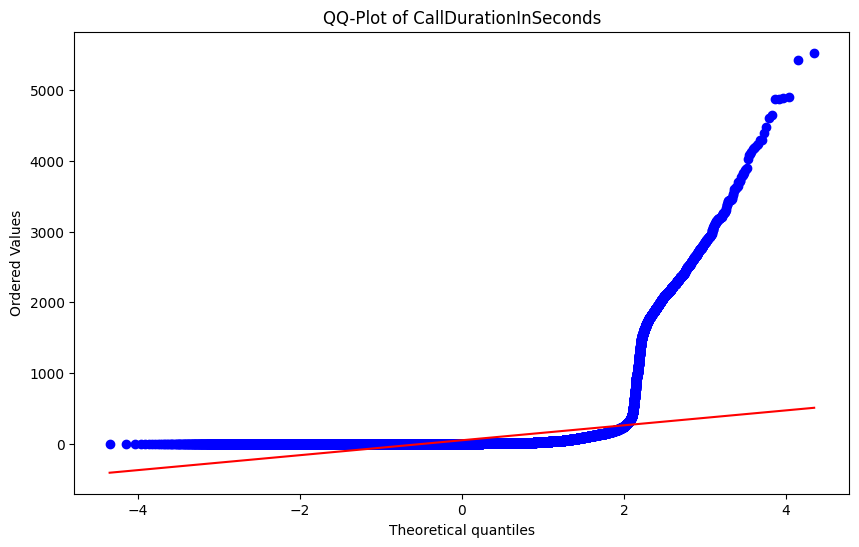

/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100129.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-Wert für CallDurationInSeconds: 1.8234029723677396e-178
CallDurationInSeconds ist nicht normalverteilt (p < 0.05).
Die Variable 'CallDurationInMinutes' ist kontinuierlich: True


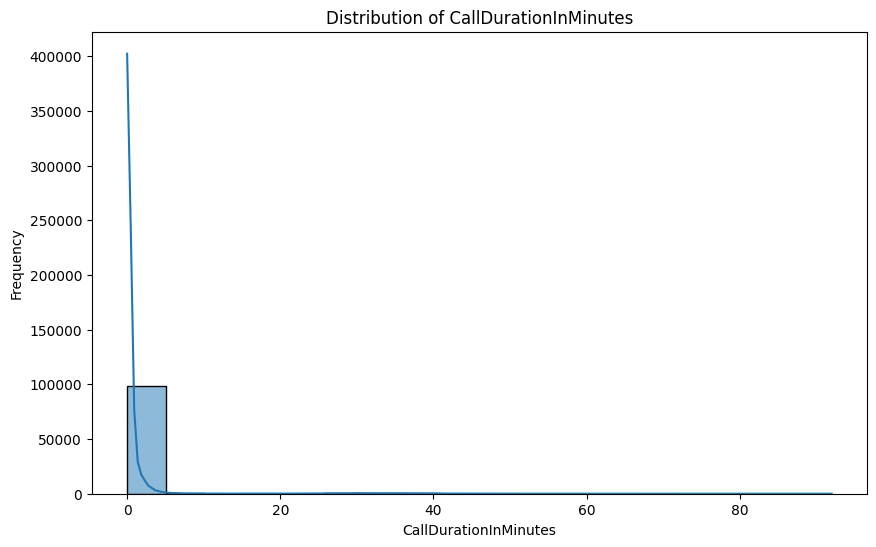

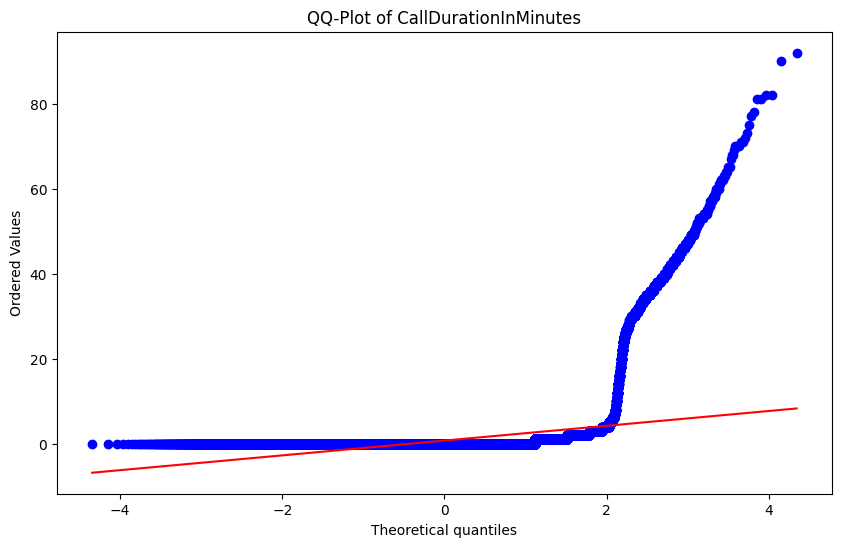

/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100129.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-Wert für CallDurationInMinutes: 1.1853817025510633e-178
CallDurationInMinutes ist nicht normalverteilt (p < 0.05).
Die Variable 'LastCallStartTime' ist kontinuierlich: False
Die Variable 'DaysSinceFirstCall' ist kontinuierlich: True


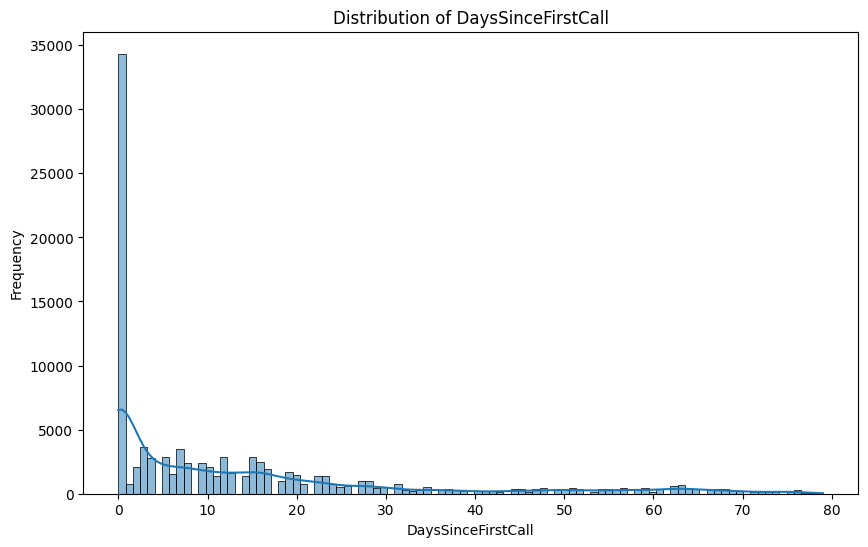

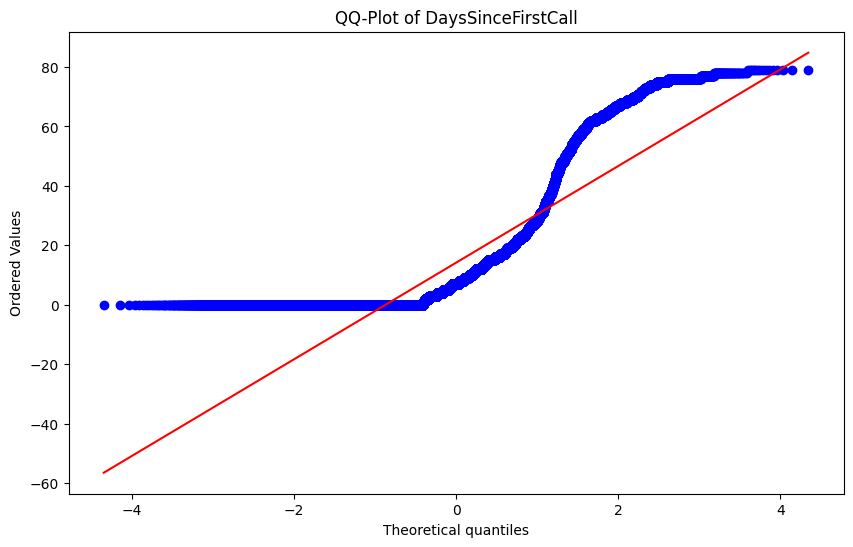

Shapiro-Wilk Test p-Wert für DaysSinceFirstCall: 8.556197966546988e-138
DaysSinceFirstCall ist nicht normalverteilt (p < 0.05).


/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100129.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Schritt 1: Daten einlesen
df = pd.read_csv('metadata.csv', delimiter=';')

# Schritt 2: ResLastCallDate in Datetime konvertieren
df['ResLastCallDate'] = pd.to_datetime(df['ResLastCallDate'], format='%Y%m%d')

# Schritt 3: Berechnung der Tage seit dem ersten Anruf für jeden Respondenten
df['DaysSinceFirstCall'] = df.groupby('resRespondent')['ResLastCallDate'].transform(lambda x: (x - x.min()).dt.days)

# Schritt 4: Funktion zur Überprüfung der Normalverteilung
def check_normal_distribution(df, column_name):
    is_continuous = np.issubdtype(df[column_name].dtype, np.number)
    print(f"Die Variable '{column_name}' ist kontinuierlich: {is_continuous}")
    
    if is_continuous:
        # Histogramm
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

        # QQ-Plot
        plt.figure(figsize=(10, 6))
        stats.probplot(df[column_name].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ-Plot of {column_name}')
        plt.show()

        # Shapiro-Wilk-Test
        shapiro_test = stats.shapiro(df[column_name].dropna())
        print(f'Shapiro-Wilk Test p-Wert für {column_name}: {shapiro_test.pvalue}')

        if shapiro_test.pvalue < 0.05:
            print(f"{column_name} ist nicht normalverteilt (p < 0.05).")
        else:
            print(f"{column_name} ist normalverteilt (p >= 0.05).")

# Schritt 5: Überprüfen der Normalverteilung für relevante Variablen
check_normal_distribution(df, 'resCallCount')
check_normal_distribution(df, 'CallDurationInSeconds')
check_normal_distribution(df, 'CallDurationInMinutes')
check_normal_distribution(df, 'LastCallStartTime')
check_normal_distribution(df, 'DaysSinceFirstCall')


## Time distribution and success rate

In [12]:
# Calculate and print success rates by day and hour
success_rate_by_day_hour = successful_calls_by_day_hour / calls_by_day_hour

# Format the success rates as percentages and handle NaN values
success_rate_annotation = success_rate_by_day_hour.applymap(lambda x: f'{x:.2%}' if pd.notnull(x) else 'N/A')

# Print success rates
print("\nSuccess Rate by Day and Hour:")
print(success_rate_annotation)

# Calculate and print the overall success rate by hour
overall_calls_by_hour = all_calls.pivot_table(index='CallHour', aggfunc='size', fill_value=0)
overall_successful_calls_by_hour = successful_calls.pivot_table(index='CallHour', aggfunc='size', fill_value=0)
success_rate_by_hour = overall_successful_calls_by_hour / overall_calls_by_hour

# Format the overall success rates as percentages
success_rate_annotation_overall = success_rate_by_hour.map(lambda x: f'{x:.2%}' if pd.notnull(x) else 'N/A')

print("\nTotal Calls and Successful Calls by Hour:")
total_and_successful_by_hour = overall_calls_by_hour.astype(str) + ' / ' + overall_successful_calls_by_hour.astype(str)
print(total_and_successful_by_hour)

print("\nOverall Success Rate by Hour:")
print(success_rate_annotation_overall)



Success Rate by Day and Hour:
LastCallWeekDay Friday Monday Saturday Thursday Tuesday Wednesday
CallHour                                                         
10.0               N/A    N/A      N/A      N/A     N/A       N/A
11.0             1.68%  8.86%    1.82%    4.27%  10.40%     1.20%
12.0             1.27%  2.18%    0.92%    2.86%   1.77%     1.00%
13.0             0.70%  1.61%    0.97%    1.79%   1.35%     0.81%
14.0             2.18%  2.71%    1.39%    1.62%   1.99%     1.35%
15.0             1.28%  1.51%    1.30%    1.36%   1.99%     0.98%
16.0             1.77%  1.59%    1.14%    2.16%   1.82%     1.85%
17.0             2.35%  1.81%    1.04%    2.46%   1.70%     2.15%
18.0             1.97%  1.62%    0.00%    1.96%   1.09%     1.55%
19.0             1.67%  2.13%      N/A    1.54%   1.29%     1.12%
20.0             0.00%  0.00%      N/A   33.33%   0.00%       N/A
22.0               N/A    N/A      N/A      N/A     N/A       N/A

Total Calls and Successful Calls by Hour:
Ca